In [1]:
import sys
import os
from tqdm import tqdm
import pandas as pd
import re
import matplotlib.pyplot as plt

parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(parent_dir)

from environment import SumoSimulator
from environment import TrafficEnvironment
from keychain import Keychain as kc
from services import plotter
from services import runner

from create_agents import create_agent_objects
from utilities import check_device
from utilities import get_params
from utilities import set_seeds


In [2]:
params = get_params(kc.PARAMS_PATH)

In [3]:
runner_params = params[kc.RUNNER]

In [4]:
phase_names = runner_params[kc.PHASE_NAMES]
phases = runner_params[kc.PHASES]

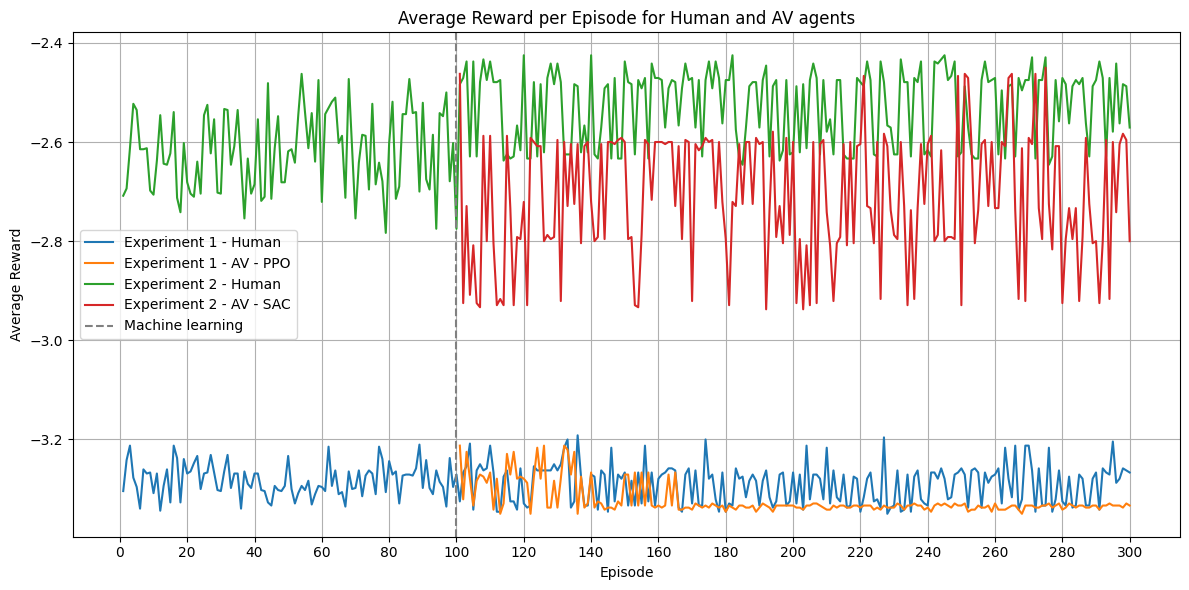

In [5]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt

def calculate_average_travel_time(folder):
    avg_travel_times = {'Human': [], 'AV': []}
    episodes = os.listdir(folder)
    
    # Extract episode numbers using regular expression
    episode_numbers = [int(re.search(r'(\d+)', episode).group()) for episode in episodes]
    
    # Sort episode numbers
    sorted_episode_numbers = sorted(episode_numbers)
    
    # Create sorted episode filenames
    sorted_episodes = [f"ep{number}.csv" for number in sorted_episode_numbers]

    for episode in sorted_episodes:
        if episode.endswith('.csv'):
            file_path = os.path.join(folder, episode)
            df = pd.read_csv(file_path)
            avg_travel_time_human = df[df['kind'] == 'Human']['reward'].mean()
            avg_travel_time_av = df[df['kind'] == 'AV']['reward'].mean()
            avg_travel_times['Human'].append(avg_travel_time_human)
            avg_travel_times['AV'].append(avg_travel_time_av)
    
    return avg_travel_times

# Replace 'folder1_path' and 'folder2_path' with your actual paths
folder1_path = 'training_records/humans_mutation_ppo'
folder2_path = 'training_records/humans_mutation_sac'

avg_travel_times_folder1 = calculate_average_travel_time(folder1_path)
avg_travel_times_folder2 = calculate_average_travel_time(folder2_path)

# Plotting
episodes = list(range(1, len(avg_travel_times_folder1['Human']) + 1))

plt.figure(figsize=(12, 6))  # Adjusted plot size

plt.plot(episodes, avg_travel_times_folder1['Human'], label='Experiment 1 - Human')
plt.plot(episodes, avg_travel_times_folder1['AV'], label='Experiment 1 - AV - PPO')
plt.plot(episodes, avg_travel_times_folder2['Human'], label='Experiment 2 - Human')
plt.plot(episodes, avg_travel_times_folder2['AV'], label='Experiment 2 - AV - SAC')

# Vertical line for machine learning milestone
plt.axvline(x=100, color='gray', linestyle='--', label="Machine learning")

plt.xlabel('Episode')
plt.ylabel('Average Reward')
plt.title('Average Reward per Episode for Human and AV agents')
plt.legend()
plt.grid(True)

# Adjusting tick marks and labels for better readability
plt.xticks(range(0, len(episodes)+1, 20))
plt.yticks(fontsize=10)

plt.tight_layout()  # Improves spacing between subplots and around labels

plt.show()


## Only machines

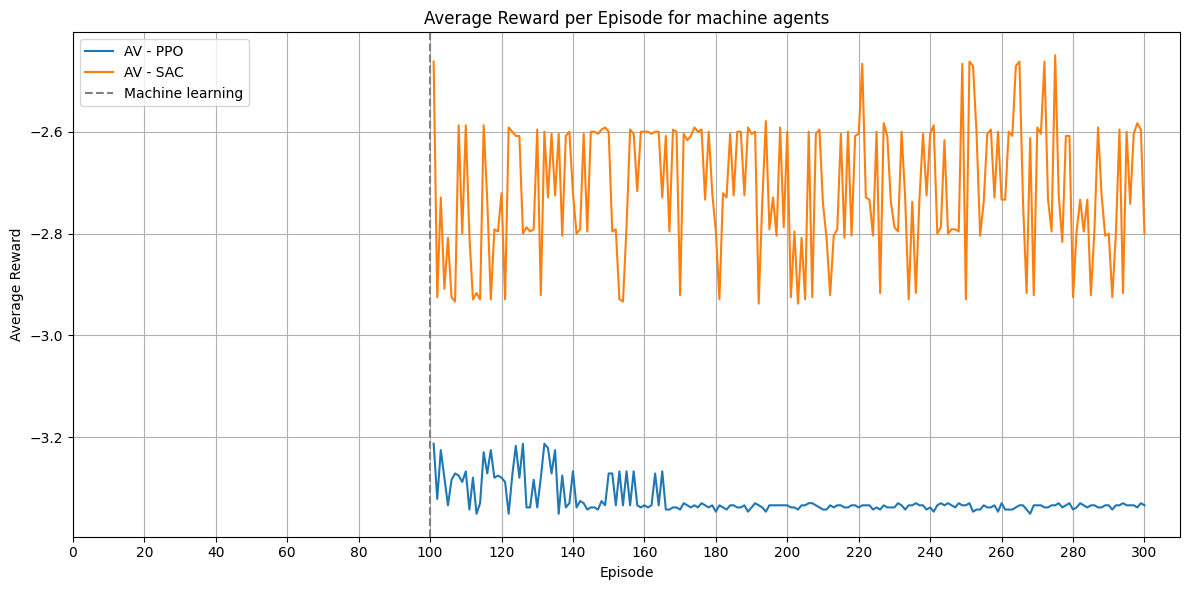

In [8]:
plt.figure(figsize=(12, 6))  # Adjusted plot size

plt.plot(episodes, avg_travel_times_folder1['AV'], label='AV - PPO')
plt.plot(episodes, avg_travel_times_folder2['AV'], label='AV - SAC')

# Vertical line for machine learning milestone
plt.axvline(x=100, color='gray', linestyle='--', label="Machine learning")

plt.xlabel('Episode')
plt.ylabel('Average Reward')
plt.title('Average Reward per Episode for machine agents')
plt.legend()
plt.grid(True)

# Adjusting tick marks and labels for better readability
plt.xticks(range(0, len(episodes)+1, 20))
plt.yticks(fontsize=10)

plt.tight_layout()  # Improves spacing between subplots and around labels

plt.show()

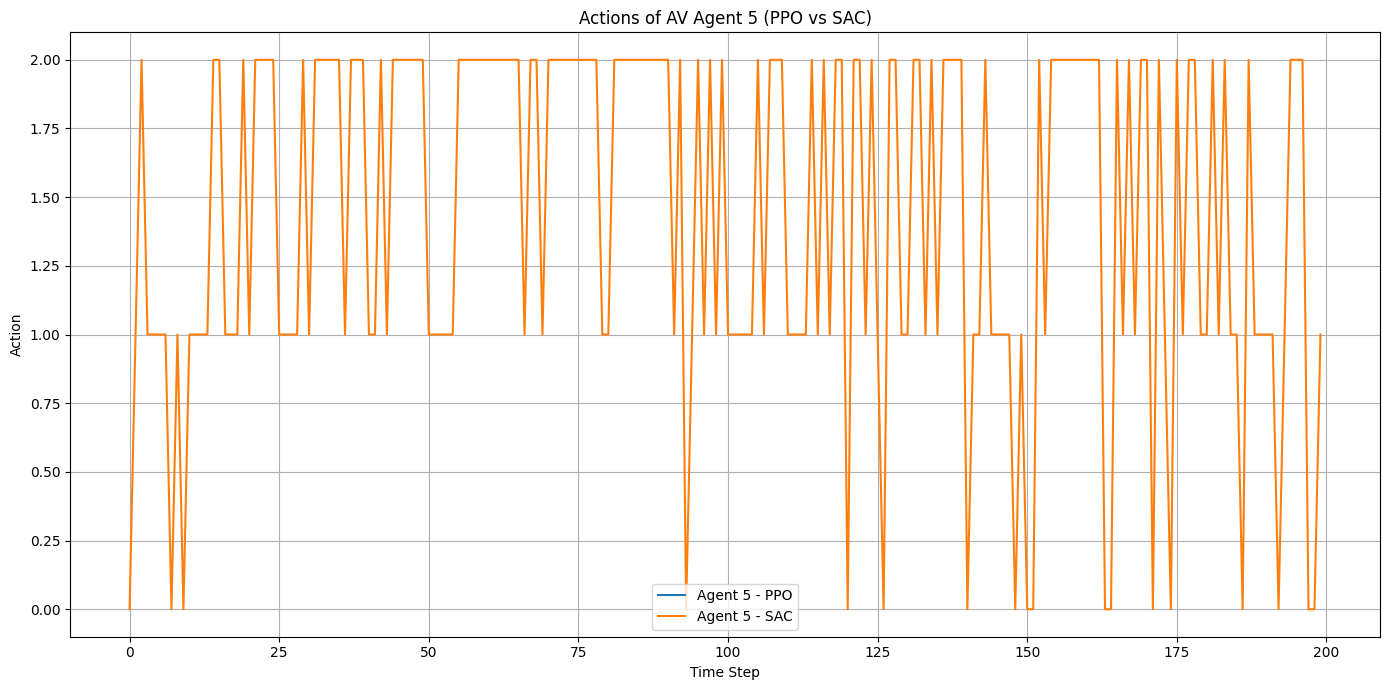

In [10]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt

def plot_agent_actions(agent_id, folder1_path, folder2_path):
    plt.figure(figsize=(14, 7))  # Adjusted plot size

    # Process PPO case (folder1_path)
    episodes_folder1 = os.listdir(folder1_path)
    episode_numbers_folder1 = [int(re.search(r'\d+', episode).group()) for episode in episodes_folder1]
    sorted_episode_numbers_folder1 = sorted(episode_numbers_folder1)
    sorted_episodes_folder1 = [f"ep{number}.csv" for number in sorted_episode_numbers_folder1]

    agent_actions_ppo = []
    for episode in sorted_episodes_folder1:
        if episode.endswith('.csv'):
            file_path = os.path.join(folder1_path, episode)
            df = pd.read_csv(file_path)
            av_actions = df[(df['kind'] == 'AV') & (df['id'] == agent_id)]['action']
            agent_actions_ppo.extend(av_actions.tolist())

    plt.plot(agent_actions_ppo, label=f'Agent {agent_id} - PPO')

    # Process SAC case (folder2_path)
    episodes_folder2 = os.listdir(folder2_path)
    episode_numbers_folder2 = [int(re.search(r'\d+', episode).group()) for episode in episodes_folder2]
    sorted_episode_numbers_folder2 = sorted(episode_numbers_folder2)
    sorted_episodes_folder2 = [f"ep{number}.csv" for number in sorted_episode_numbers_folder2]

    agent_actions_sac = []
    for episode in sorted_episodes_folder2:
        if episode.endswith('.csv'):
            file_path = os.path.join(folder2_path, episode)
            df = pd.read_csv(file_path)
            av_actions = df[(df['kind'] == 'AV') & (df['id'] == agent_id)]['action']
            agent_actions_sac.extend(av_actions.tolist())

    plt.plot(agent_actions_sac, label=f'Agent {agent_id} - SAC')

    plt.xlabel('Time Step')
    plt.ylabel('Action')
    plt.title(f'Actions of AV Agent {agent_id} (PPO vs SAC)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    plt.show()

# Replace 'folder1_path' and 'folder2_path' with your actual paths
folder1_path = 'training_records/humans_mutation_ppo'
folder2_path = 'training_records/humans_mutation_sac'

# Specify the AV agent ID you want to plot
agent_id = 5

plot_agent_actions(agent_id, folder1_path, folder2_path)
